# Statistical Analysis on Sales of Cars in Uk

**Outline of study** 

- Step 1: Get data and cleanup 
- Step 2: Explore Data (asking useful questions) 
- Step 3: Perform correlation analysis on car prices vs car features
- Step 4: Test that prices vary for different car models (Hypothesis testing)
- Step 5: Predict car prices (using suitable performance matrices)
- Step 6: Prepare your Report 

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1: Get data and Cleanup

Here, we start by gathering all the separate data files 

In [2]:
audi_df = pd.read_csv('audi.csv') 
cclass_df = pd.read_csv('cclass.csv')
ford_df = pd.read_csv('ford.csv')
merc_df = pd.read_csv('merc.csv')
bmw_df = pd.read_csv('bmw.csv')
toyota_df = pd.read_csv('toyota.csv')
vw_df = pd.read_csv('vw.csv')
hyundi_df = pd.read_csv('hyundi.csv')
focus_df = pd.read_csv('focus.csv')
skoda_df = pd.read_csv('skoda.csv')
vauxhall_df = pd.read_csv('vauxhall.csv')

At this stage, we start viewing the separate data files indidually so as to have an overview of them and to understand their shapes (number of columns and rows)

In [3]:
# audi_df cars
audi_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
audi_df['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

In [5]:
# shape of data
audi_df.shape

(10668, 9)

In [6]:
cclass_df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [7]:
cclass_df.shape

(3899, 7)

In [8]:
ford_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [9]:
ford_df.shape

(17965, 9)

In [10]:
merc_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [11]:
merc_df.shape

(13119, 9)

In [12]:
bmw_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [13]:
bmw_df.shape

(10781, 9)

In [14]:
toyota_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [15]:
toyota_df.shape

(6738, 9)

In [16]:
vw_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [17]:
hyundi_df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [18]:
focus_df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6


In [19]:
skoda_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


In [20]:
vauxhall_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4


In [21]:
#car_data.to_csv('Complete_data.csv')

**Observations**

- All collected car models are made of 9 features except 'Cclass' and 'Focus' models with 7 features (without Tax and mpg) and hence may likely to be dropped so as to ensure data column consistency.
- hyundi_df car model specified its Tax columns in Euros, this will be corrected for consistency purposes.

In [22]:
# change column name
hyundi_df = hyundi_df.rename(columns= {'tax(£)': 'tax'})

hyundi_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [23]:
# creating brand column for each data
audi_df['brand'] = 'audi'
    
ford_df['brand'] = 'ford'

merc_df['brand'] = 'merc'

bmw_df['brand'] = 'bmw'

toyota_df['brand'] = 'toyota'

vw_df['brand'] = 'vw'

hyundi_df['brand'] = 'hyundi'

skoda_df['brand'] = 'skoda'

vauxhall_df['brand'] = 'vauxhall'

**Merging Data Together**

We are to merge the different datasets togetherso that we can efficiently perform analysis on them and building a good generic model for them.

In [24]:
frames = [audi_df, ford_df, merc_df, bmw_df,
          toyota_df, vw_df, hyundi_df, skoda_df, vauxhall_df] # create frame containing all the separate files

car_data = pd.concat(frames)  # we concatenate all the files into a car_data

In [25]:
car_data.head()  # lets view the first five rows of the data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


In [26]:
car_data['fuelType'].value_counts() # lets check for uniques and count the number for each category

Petrol      54928
Diesel      40928
Hybrid       3078
Other         247
Electric        6
Name: fuelType, dtype: int64

In [27]:
car_data.drop(car_data.index[car_data['year']==2060], inplace=True) # we remove the year 2060

In [28]:
car_data['year'].value_counts()

2019    26771
2017    21733
2016    15850
2018    13664
2015     7645
2020     4465
2014     4085
2013     2603
2012      634
2011      432
2010      340
2009      278
2008      200
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1970        2
1996        2
Name: year, dtype: int64

### Step 2: Explore Data (asking useful questions)

In other as to examine our data and turn it into useful piece of information, the following statistical research questions and methods will be employed.

**Statistical Research Questions**
- 1. In which year was the highest and lowest car prices recorded ?
- 2. Which car brands have the highest prices and taxes ?
- 3. Are car mileage, mpg, engineSize, tax good indicators of car prices ?
- 4. Which features strongly affects the outcome of car prices ?
- 5. Does the prices of some car's models significantly different from other models ?
- 6. Can we predict car prices based on the available features ?

**Statistical Methods to be used**
- 1. Exploratory data analysis (descriptive statistics)
- 2. Correlation Analysis [Pearson's Corr (linear) and Spearman's Corr (non-linear)]
- 3. Hypothesis testing 
- 4. Predictive Analytics

**1. In which year was the highest and lowest car prices recorded ?**

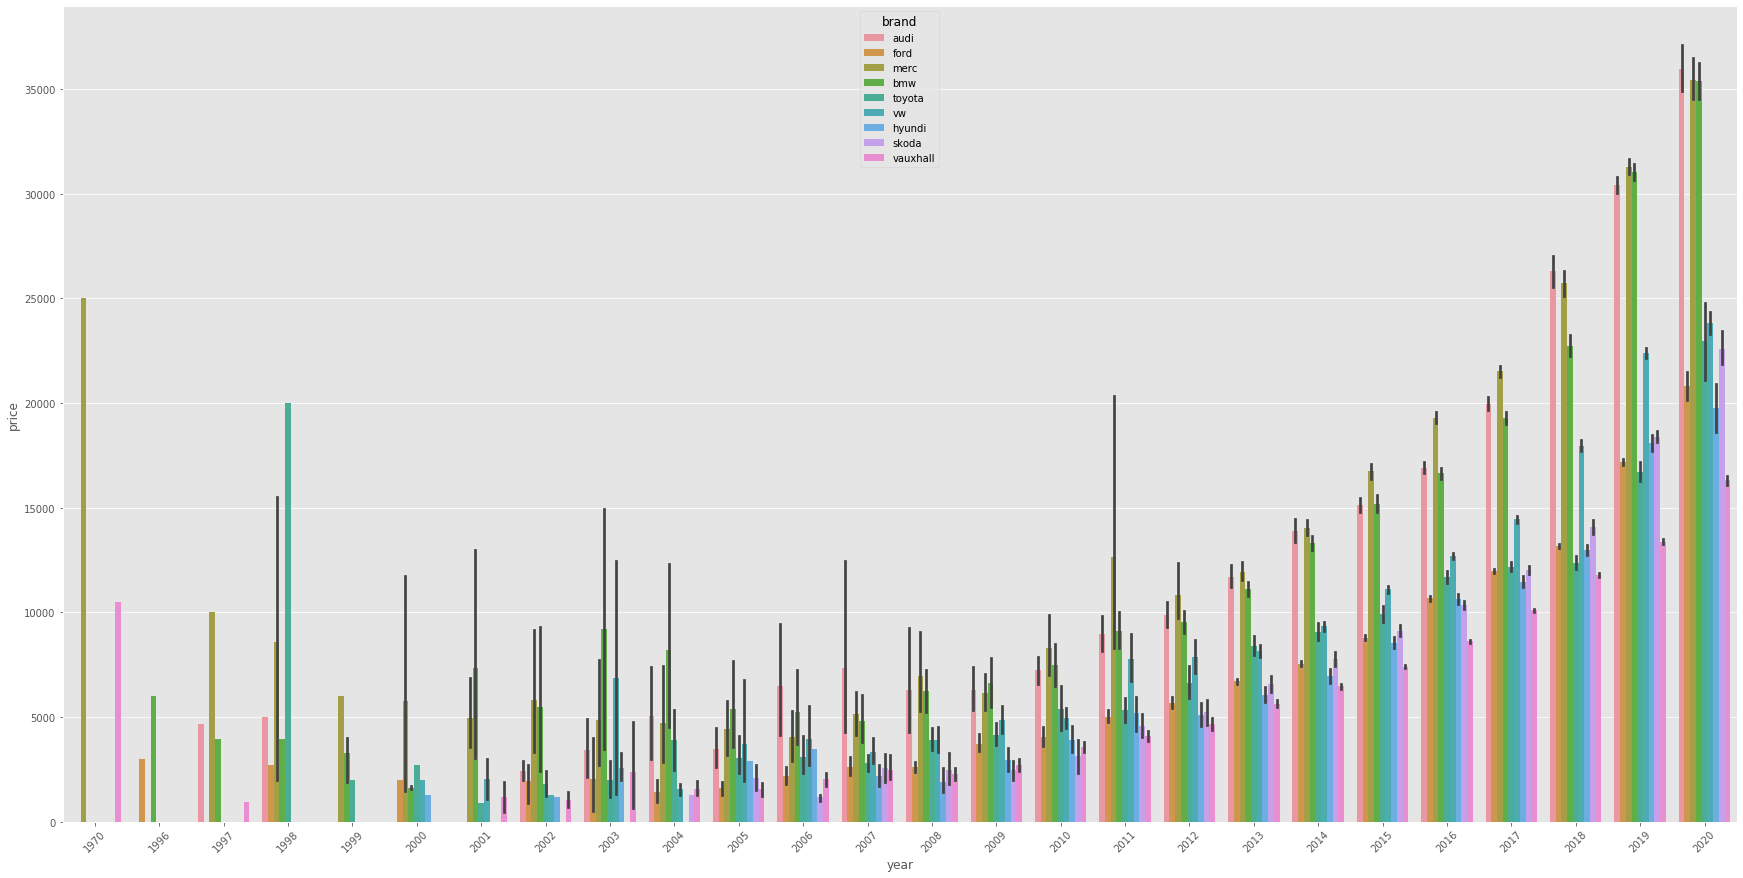

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(30, 15))
sns.barplot(data=car_data, x='year', y='price', hue='brand')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

**2. Which car brands have the highest prices and taxes ?**

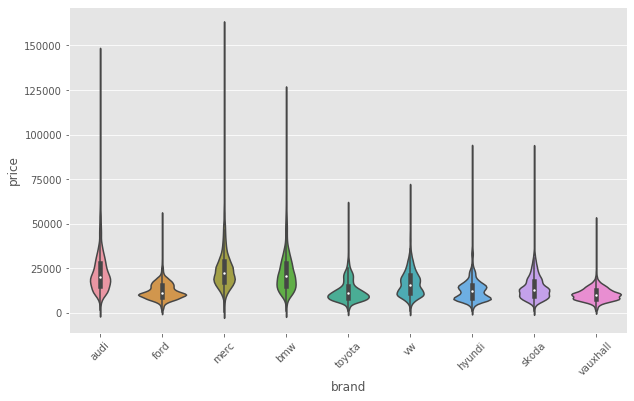

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.violinplot(data=car_data, x='brand', y='price')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

**3. Are car mileage, mpg, engineSize, tax good indicators of car prices ?**

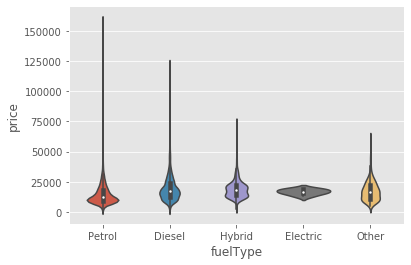

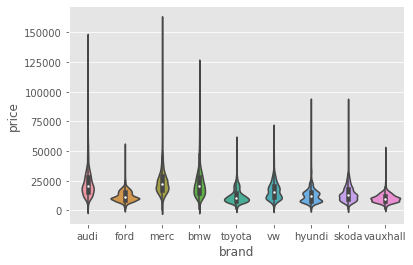

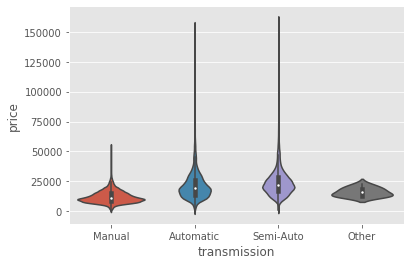

In [31]:
def plot_violin(car_data, cols, col_y = 'price'):
    for col in cols:
        plt.style.use('ggplot')
        sns.violinplot(col, col_y, data=car_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['fuelType', 'brand', 'transmission']
plot_violin(car_data, cat_cols)    

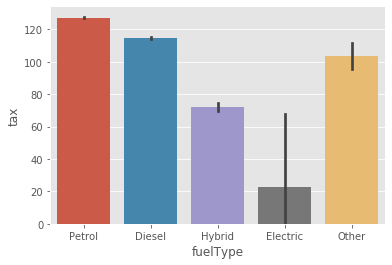

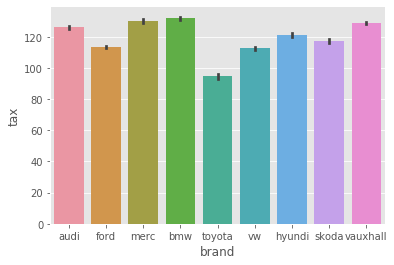

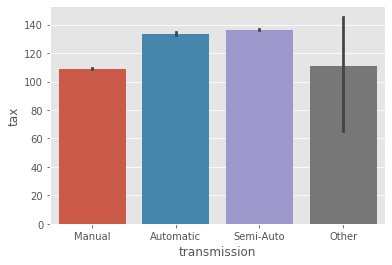

In [32]:
def plot_violin(car_data, cols, col_y = 'tax'):
    for col in cols:
        plt.style.use('ggplot')
        sns.barplot(col, col_y, data=car_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['fuelType', 'brand', 'transmission']
plot_violin(car_data, cat_cols)    

**Note:** In order as to answer all our statistical questions, we have to move to the next outline

### Step 3: Perform correlation analysis on car prices vs car features

Here we try to carry out correlation analysis to find out which features will actually affect the determination of car prices. From our above plottings, we were able to see that categoricalfeatures (transmission, fuelType and brand) hard some slight impact on the model. This relation possibly dims them fit for predicting car prices. Now, for our numerical features (mpg, engineSize, price etc) we will be making use of the ***Pearson's*** since we will be building a regression model for price prediction.

In [33]:
corr_mx = car_data.corr()
corr_mx.head()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.492059,-0.740443,0.195825,-0.132909,-0.038560
price,0.492059,1.000000,-0.417946,0.307667,-0.296440,0.638113
mileage,-0.740443,-0.417946,1.000000,-0.220786,0.185671,0.109081
tax,0.195825,0.307667,-0.220786,1.000000,-0.451446,0.278420
mpg,-0.132909,-0.296440,0.185671,-0.451446,1.000000,-0.248214


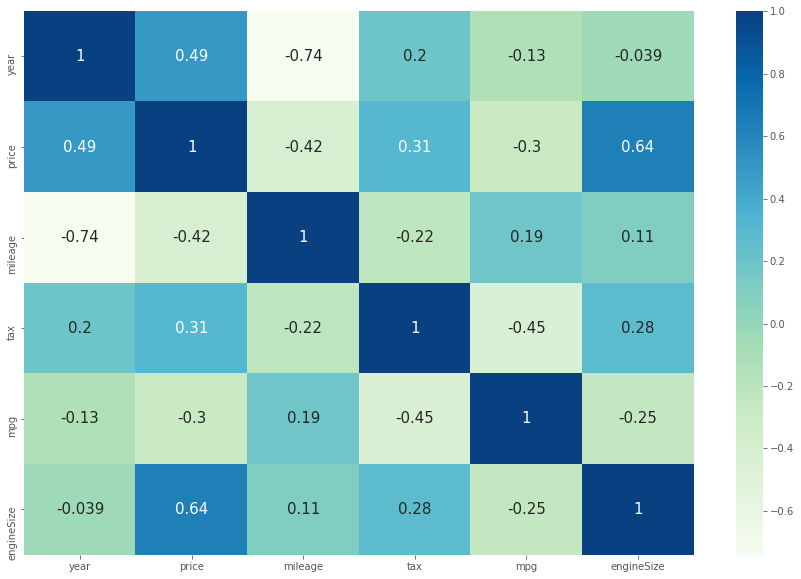

In [34]:
# make a correlation plot (heatmap)
corr_mx = car_data.corr()
f, ax = plt.subplots(figsize=(15,10))
plt.style.use('ggplot')
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':15}, cmap='GnBu')

**Observation**

- There is a high positive correlation between car prices and engineSize (with rscore of 0.64). 
- Mileage and mpg exhibited a very weak negative correlation with car prices
- Year and tax equally exhibited weak correlations but in the positive.

### Step 4: Test that prices vary for different car models (Hypothesis testing)

In [35]:
Hp_data = pd.DataFrame()  # we create data for the car brands
Hp_data['audi_price'] = audi_df['price']
Hp_data['cclass_price'] = cclass_df['price']
Hp_data['ford_price'] = ford_df['price']
Hp_data['merc_price'] = merc_df['price']
Hp_data['bmw_price'] = bmw_df['price']
Hp_data['toyota_price'] = toyota_df['price']
Hp_data['vw_price'] = vw_df['price']
Hp_data['hyundi_price'] = hyundi_df['price']
Hp_data['focus_price'] = focus_df['price']
Hp_data['skoda_price'] = skoda_df['price']
Hp_data['vauxhall_price'] = vauxhall_df['price']

Hp_data.tail()

,audi_price,cclass_price,ford_price,merc_price,bmw_price,toyota_price,vw_price,hyundi_price,focus_price,skoda_price,vauxhall_price
10663,16999,NaN,12000,18200,19995,NaN,27430,NaN,NaN,NaN,10600
10664,16999,NaN,17500,18100,11495,NaN,25750,NaN,NaN,NaN,10798
10665,17199,NaN,9300,16500,12000,NaN,32990,NaN,NaN,NaN,7990
10666,19499,NaN,12000,17000,14500,NaN,11711,NaN,NaN,NaN,10990
10667,15999,NaN,10500,15850,11400,NaN,25981,NaN,NaN,NaN,11590


In [36]:
Hp_data.shape

(10668, 11)

In [37]:
Hp_data = Hp_data.dropna(axis=0)

In [38]:
Hp_data.isnull().sum()

audi_price        0
cclass_price      0
ford_price        0
merc_price        0
bmw_price         0
toyota_price      0
vw_price          0
hyundi_price      0
focus_price       0
skoda_price       0
vauxhall_price    0
dtype: int64

In [39]:
Hp_data.tail()

,audi_price,cclass_price,ford_price,merc_price,bmw_price,toyota_price,vw_price,hyundi_price,focus_price,skoda_price,vauxhall_price
3894,14000,14700.0,14497,22290,19980,5230.0,24250,8290.0,5939.0,20990.0,5691
3895,30990,18500.0,16497,21290,17980,8500.0,17500,12990.0,11748.0,21690.0,9998
3896,15490,11900.0,10981,24490,12980,7500.0,26490,22990.0,12999.0,6950.0,12990
3897,20990,11300.0,10690,32290,20440,7500.0,20290,12990.0,7999.0,10950.0,8970
3898,12990,14800.0,8690,22390,17980,8250.0,17290,7622.0,7500.0,32950.0,14990


In [40]:
Hp_data.describe()

,audi_price,cclass_price,ford_price,merc_price,bmw_price,toyota_price,vw_price,hyundi_price,focus_price,skoda_price,vauxhall_price
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,21930.878943,23674.286997,12195.252629,24183.439600,24297.892793,12528.963837,18322.334188,12997.525006,13815.002565,14274.081303,8563.852526
std,10481.117871,8960.218218,4465.971012,10814.908567,10691.434398,5122.185277,5794.282970,5853.828396,4354.154256,6167.579830,2634.048736
min,6800.000000,1290.000000,3495.000000,2880.000000,5299.000000,899.000000,1287.000000,3491.000000,1450.000000,2795.000000,495.000000
25%,15263.000000,17690.000000,8995.000000,17767.500000,17338.000000,9440.000000,13748.000000,8295.000000,10699.000000,9495.000000,6999.000000
50%,19465.000000,22980.000000,11000.000000,21498.000000,22050.000000,11500.000000,17995.000000,12195.000000,13498.000000,12995.000000,8300.000000
75%,25998.500000,28900.000000,15000.000000,27995.000000,28272.500000,14295.000000,21500.000000,15990.000000,16995.000000,17990.000000,9996.500000
max,137995.000000,88995.000000,42489.000000,149948.000000,123456.000000,37440.000000,40999.000000,43995.000000,54995.000000,38990.000000,21105.000000


In [41]:
Hp_data.shape

(3899, 11)

In [42]:
for x in Hp_data:
    q75,q25 = np.percentile(Hp_data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Hp_data.loc[Hp_data[x] < min,x] = np.nan
    Hp_data.loc[Hp_data[x] > max,x] = np.nan

In [43]:
Hp_data.isnull().sum()

audi_price        180
cclass_price       80
ford_price         51
merc_price        219
bmw_price         212
toyota_price      283
vw_price           54
hyundi_price       95
focus_price        42
skoda_price        69
vauxhall_price    173
dtype: int64

In [44]:
Hp_data = Hp_data.dropna(axis = 0)

In [45]:
Hp_data.isnull().sum()

audi_price        0
cclass_price      0
ford_price        0
merc_price        0
bmw_price         0
toyota_price      0
vw_price          0
hyundi_price      0
focus_price       0
skoda_price       0
vauxhall_price    0
dtype: int64

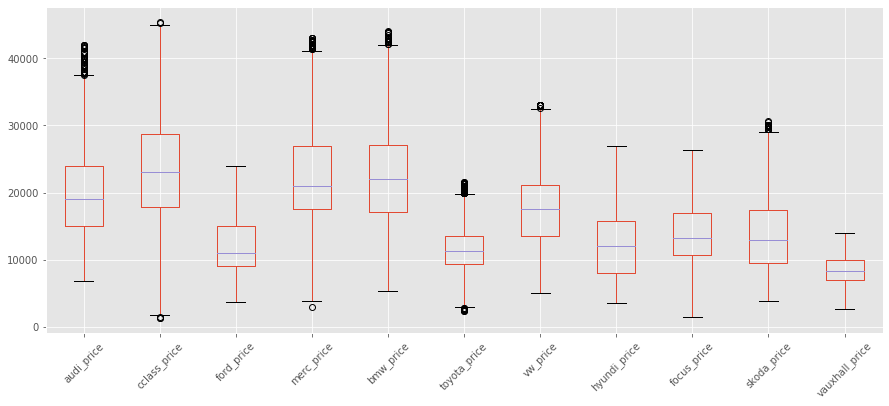

<Figure size 2160x1080 with 0 Axes>

In [46]:
plt.style.use('ggplot')
ax = Hp_data.plot.box(figsize=(15, 6))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=10)
#ax.xlabel('Car brands')
#ax.ylabel('Prices')

**Observations**
- It becomes hard to tell from the plots, they look a little different, but are they? Lets apply some hypothesis tests 



**Parametric Statistical Hypothesis Tests: Analysis of Variance Test (ANOVA)** 

This tests whether the average car prices for the different models (brands) are significantly different.

Interpretation:
* H0: The average prices for all brands are equal
* H1: One or more of the average prices for the brands are unequal

In [47]:
from scipy.stats import f_oneway
data1 = Hp_data['audi_price']
data2 = Hp_data['cclass_price']
data3 = ford_df['price']
data4 = merc_df['price']
data5 = bmw_df['price']
data6 = toyota_df['price']
data7 = vw_df['price']
data8 = hyundi_df['price']
data9 = focus_df['price']
data10 = skoda_df['price']
data11 = vauxhall_df['price']

stat, p = f_oneway(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The average prices for all brands are equal')
else:
    print('The average prices for all brands are unequal')

stat=4304.436, p=0.000
The average prices for all brands are unequal


In [48]:
from scipy.stats import ttest_rel
data1 = Hp_data['audi_price']
data2 = Hp_data['cclass_price']
data3 = Hp_data['ford_price']
data4 = Hp_data['merc_price']
data5 = Hp_data['bmw_price']
data6 = Hp_data['toyota_price']
data7 = Hp_data['vw_price']
data8 = Hp_data['hyundi_price']
data9 = Hp_data['focus_price']
data10 = Hp_data['skoda_price']
data11 = Hp_data['vauxhall_price']

stat, p = ttest_rel(data10, data11) #, data3, data4) # data5, data6, data7, data8, data9, data10, data11)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The average prices for all brands are equal')
else:
    print('The average prices for all brands are unequal')

stat=47.458, p=0.000
The average prices for all brands are unequal


Based on the above statistical results, since the **p-value is 0.000** and is less than **reject our null hypotheses** that the average prices for all brands are equal. Thats to say that our initial question 'Does the prices of some car's models significantly different from other models ?' can be given a Yes !!!.

### Step 5: Predict car prices (using suitable performance matrices)

In [49]:
#last_column = car_data['price']
#df = car_data.pop('price')
#df['price'] = last_column

df = pd.DataFrame(car_data, columns=['year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'brand', 'price'])

In [50]:
df.head()

,year,transmission,mileage,fuelType,tax,mpg,engineSize,brand,price
0,2017,Manual,15735,Petrol,150,55.4,1.4,audi,12500
1,2016,Automatic,36203,Diesel,20,64.2,2.0,audi,16500
2,2016,Manual,29946,Petrol,30,55.4,1.4,audi,11000
3,2017,Automatic,25952,Diesel,145,67.3,2.0,audi,16800
4,2019,Manual,1998,Petrol,145,49.6,1.0,audi,17300


In [51]:
# The data is being swamped with data with large absolute values. Hence, the need to scale. 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the input data
input_data = df[['year','mileage','tax', 'mpg', 'engineSize']].to_numpy()
data_scaled = scaler.fit_transform(input_data)
data_scaled_df = pd.DataFrame (data_scaled, columns = ['year','mileage','tax', 'mpg', 'engineSize'])

In [52]:
data_scaled_df['transmission'] = df['transmission'].tolist()
data_scaled_df['fuelType'] = df['fuelType'].tolist()
data_scaled_df['brand'] = df['brand'].tolist()

In [53]:
data_scaled_df.head()

,year,mileage,tax,mpg,engineSize,transmission,fuelType,brand
0,0.94,0.048712,0.258621,0.117109,0.212121,Manual,Petrol,audi
1,0.92,0.112081,0.034483,0.135813,0.303030,Automatic,Diesel,audi
2,0.92,0.092709,0.051724,0.117109,0.212121,Manual,Petrol,audi
3,0.94,0.080344,0.250000,0.142402,0.303030,Automatic,Diesel,audi
4,0.98,0.006183,0.250000,0.104782,0.151515,Manual,Petrol,audi


In [54]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data_scaled_df[['transmission', 'fuelType', 'brand']])
data_scaled_df[['transmission', 'fuelType', 'brand']] = enc.transform(data_scaled_df[['transmission', 'fuelType', 'brand']])

In [55]:
data_scaled_df.head()

,year,mileage,tax,mpg,engineSize,transmission,fuelType,brand
0,0.94,0.048712,0.258621,0.117109,0.212121,1.0,4.0,0.0
1,0.92,0.112081,0.034483,0.135813,0.303030,0.0,0.0,0.0
2,0.92,0.092709,0.051724,0.117109,0.212121,1.0,4.0,0.0
3,0.94,0.080344,0.250000,0.142402,0.303030,0.0,0.0,0.0
4,0.98,0.006183,0.250000,0.104782,0.151515,1.0,4.0,0.0


In [56]:
X = data_scaled_df
y = df['price']

In [57]:
# split data into train and validation data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

**Linear Regression Model**

In [58]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr= lr_model.predict(X_valid)

from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_lr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_lr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_lr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_lr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(lr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(lr_model.score(X_valid, y_valid)))

MAE: 3475.98190713512
MSE: 27509579.69547355
RMSE: 5244.957549444376
R2_score: 0.7176982294289196
__________________________________________

Accuracy on train data: 0.7153980527679171
Accuracy on test data: 0.7176982294289196


**Decision Tree Regressor**

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state = 0)
dtr_model.fit(X_train, y_train)

y_pred_dtr = dtr_model.predict(X_valid)

print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_dtr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_dtr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_dtr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_dtr)))
print('__________________________________________\n')
#print('Accuracy on train data: {}'.format(accuracy_score(y_train, dtr_model.predict(X_train))))
#print('Accuracy on test data: {}'.format(accuracy_score(y_test, y_pred_dtr)))
print('Accuracy on train data: {}'.format(dtr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(dtr_model.score(X_valid, y_valid)))

MAE: 1693.453469342995
MSE: 11123375.109793276
RMSE: 3335.1724257964947
R2_score: 0.8858525458047034
__________________________________________

Accuracy on train data: 0.9991864458887934
Accuracy on test data: 0.8858525458047034


**K-Neighbors Regressor**

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor()
knr_model.fit(X_train, y_train)

y_pred_knr = knr_model.predict(X_valid)

print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_knr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_knr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_knr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_knr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(knr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(knr_model.score(X_valid, y_valid)))

MAE: 1550.2463301519024
MSE: 7772923.833328405
RMSE: 2787.9963833061915
R2_score: 0.9202346896988829
__________________________________________

Accuracy on train data: 0.9486944322075054
Accuracy on test data: 0.9202346896988829


**Random Forest Regressor**

In [61]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()     # n_estimators=100, max_depth=10, random_state = 0)
rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_valid)

print('MAE: {}'.format(metrics.mean_absolute_error(y_valid, y_pred_rfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_valid, y_pred_rfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_rfr))))
print('R2_score: {}'.format(r2_score(y_valid, y_pred_rfr)))
print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rfr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rfr_model.score(X_valid, y_valid)))

MAE: 1360.9597660263541
MSE: 5827352.932569963
RMSE: 2413.991079637612
R2_score: 0.9402000296326679
__________________________________________

Accuracy on train data: 0.9910430207195131
Accuracy on test data: 0.9402000296326679


Text(0.5, 0, 'Feature importance')

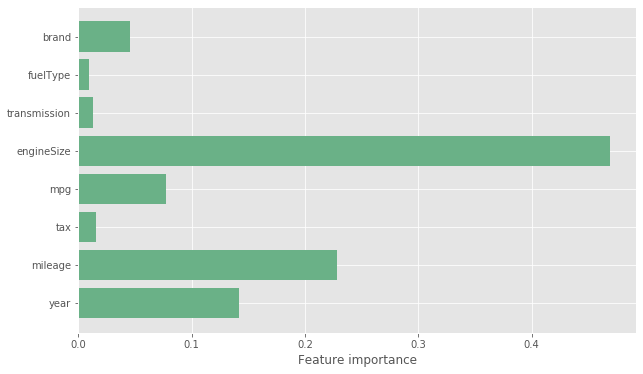

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
rfr_model.feature_importances_
#sns.set_style("whitegrid")
plt.barh(X.columns, rfr_model.feature_importances_, color='#6AB187')
plt.xlabel('Feature importance')

In [63]:
comp_table = pd.DataFrame()

comp_table['Models'] = ['LinearRegression', 'DecisionTree', 'KNN', 'RF_Regression']
comp_table['Accuracy'] = [lr_model.score(X_valid, y_valid), dtr_model.score(X_valid, y_valid), 
                          knr_model.score(X_valid, y_valid), rfr_model.score(X_valid, y_valid)]

In [64]:
comp_table.head()

,Models,Accuracy
0,LinearRegression,0.717698
1,DecisionTree,0.885853
2,KNN,0.920235
3,RF_Regression,0.940200


As can be seen from the table above that the RF_Regression and the KNN models outperformed others with accuracy scores of 94.02% and 92.02% respectively. Thus, the RF_Regression model can be selected as best for the prediction of car prices.

### Next Step.. !!

Prepare Report